## LSTM Try Outs

This workbook serves two purposes:

    - Clean the dataset Weather Australia (to move to utils afterwards)
    - check which drawbacks occur when passing non-time series data to an LSTM

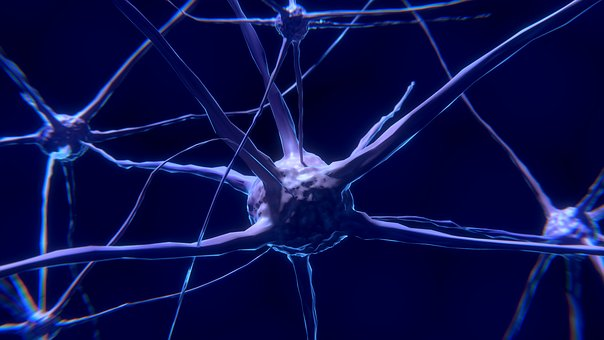

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import *
from ML_algorithms import *
from utils import *

Using TensorFlow backend.


At first I'd like to clean the weather in australia dataset. I will take suggestions from this kernel from kaggle (https://www.kaggle.com/aninditapani/will-it-rain-tomorrow).

In [2]:
# read the dataset
rain = pd.read_csv("data_files/TimeSeries/weatherAUS.csv")

In [3]:
# let's check for values -> the first 4 columns can actually go
rain.count().sort_values()

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64

In [4]:
# getting rid of columns and all nan
rain = rain.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM']
                 ,axis=1)

In [5]:
# simply copied:
#Lets deal with the categorical cloumns now
# simply change yes/no to 1/0 for RainToday and RainTomorrow
rain['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
rain['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

 - Now I saw Alex workbook. Thank you :-)

In [6]:
for i in ["Temp3pm", "Pressure3pm", "Temp9am", "Pressure9am", "Humidity9am", "Humidity3pm", "MinTemp",
          "MaxTemp", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]:
    rain[i] = rain[i].fillna(rain[i].mean())

In [7]:
rain = rain.drop(["WindGustDir","WindDir9am"], axis=1)

In [8]:
rain = rain.dropna(how='any')

In [9]:
rain.isna().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [10]:
# take the Date column -> transform to a pandas like format
# and make it a count
rain["Date"] = pd.to_datetime(rain["Date"])
start = min(rain["Date"])
date_features = [(i - start) for i in rain["Date"]]
date_features = [i.days for i in date_features]
rain["Date"] = date_features

In [11]:
# Rearrange columns
cols = rain.columns.tolist()
cols = cols[-1:] + cols[:-1]
rain = rain[cols]

In [12]:
# one hot encode all categorical values
rain = pd.get_dummies(rain)

### The Model

In [13]:
random_state = np.random.RandomState(30)

In [14]:
# split the datat
X_train, X_test, X_val, y_train, y_test, y_val = split_data_scale(rain, 0.2, 0.1, "RainTomorrow",["Date"], random_state)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
lstm = keras_lstm(len(X_train), 32)

TypeError: __init__() missing 1 required positional argument: 'output_dim'

In [ ]:
import keras
print(keras.__version__)